# Introduction
Apart from predicting the quality of a wine and whether it'd be good, is there any other way we can use the data?

Remember that we combined our red wine and white wine data together?

What if one day, you were not able to tell what wine you were working with and had only physiochemical properties to go on.

We can train a machine learning model to tell the two kinds of wines apart.

To be honest, compared to the model in Part III, this part can seem kind of frivilous since we can just...look at the color of the wine. 

That said, there's still a level of usefulness behind this - we'll tell you more later.

### Step 1: Import the following libraries
1. pandas as pd
2. train_test_split - sklearn.model_selection
3. DummyClassifier - sklearn.dummy
4. LogisticRegression - sklearn.linear_model
5. DecisionTreeClassifier - sklearn.tree
6. RandomForestClassifier - sklearn.ensemble
7. GradientBoostClassifier - sklearn.ensemble
8. f1_score - sklearn.metrics
9. roc_auc_score - sklearn.metrics
9. confusion matrix - sklearn.metrics

In [1]:
# Step 1: Import the libraries 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

### Step 2: Read the combined red + white wine CSV

In [4]:
# Step 2: Read the combined red + white wine CSV
df = pd.read_csv("df_comb.csv", index_col = 0)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,isRed
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


### Step 3: Get the value counts of isRed
We sort of know what the proportion of 0 and 1 is, since we derived it from red and white wine dataset with known number of rows. 

That said, give it a shot nonetheless.

In [5]:
# Step 3: Count values of isRed column
df['isRed'].value_counts()

0    4898
1    1599
Name: isRed, dtype: int64

Looks like we're still working with a slightly imbalanced dataset.

### Step 4: Prepare the indepedent and dependent variables
Let's prepare our variables for training. 
1. Declare a variable, and assign the indepedent variables to it, i.e. drop 'quality' and 'isRed' columns
2. Declare another variable, and assign the dependent variables to it, i.e. get only the 'isRed' column values

In [12]:
# Step 4: Declare your independent and dependent variables
X = df.drop(['quality', 'isRed'], axis = 1)
y = df['isRed']


### Step 5: Split your dataset for training and testing

In [13]:
# Step 5: Split your dataset, with a test_size of 0.2 and stratified by y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

### Step 6: Train a DummyClassifier and assess results
For starters, train a DummyClassifier and assess the results to get a baseline.

Compare the dummy predictiona and the test data with f1_score (use 'micro' with the average parameter), AUC score, and a confusion matrix. 

In [15]:
# Step 6: Train a DummyClassifier and assess the predictions with f1_score, AUC, and confusion matrix
dummy = DummyClassifier()
dummy.fit(X_train, y_train)
y_pred = dummy.predict(X_test)
print(metrics.f1_score(y_test, y_pred, average = 'micro'))
print(metrics.roc_auc_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

0.7538461538461538
0.5
[[980   0]
 [320   0]]


### Step 7: Train a model and assess results
Now that we have a benchmark, let's do the same using a proper model such as DecisionTree or RandomForest.

In [18]:
# Step 7: Train a model and asssess its prediction
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
print(metrics.f1_score(y_test, y_pred, average = 'micro'))
print(metrics.roc_auc_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

0.9861538461538462
0.9802933673469388
[[972   8]
 [ 10 310]]


### Step 8: Train another model and assess results
Without spoiling anything, you'll realize that the results are a bit surprising. 

Try another model this time and see if it's as good. 

In [19]:
# Step 8: Train another model and assess the predictions
randf = RandomForestClassifier()
randf.fit(X_train, y_train)
y_pred = randf.predict(X_test)
print(metrics.f1_score(y_test, y_pred))
print(metrics.roc_auc_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

0.9841269841269841
0.984375
[[980   0]
 [ 10 310]]


### Step 9: Create a feature importance table for your model
After you train your models, you might be curious what are the features that make it perform so well. 

Knowing which features are important is useful because you can then share your insights with stakeholders. 

In fact, this is a simple thing to find out.

That is because the models you trained have an attribute called .feature_importances_, which is a list of scores that correspond to the columns. 

For business purposes, you can try creating a DataFrame like this so that you can explain your model to stakeholders.

The top few features are the ones that the model is using to tell the two different kinds of wines apart. 

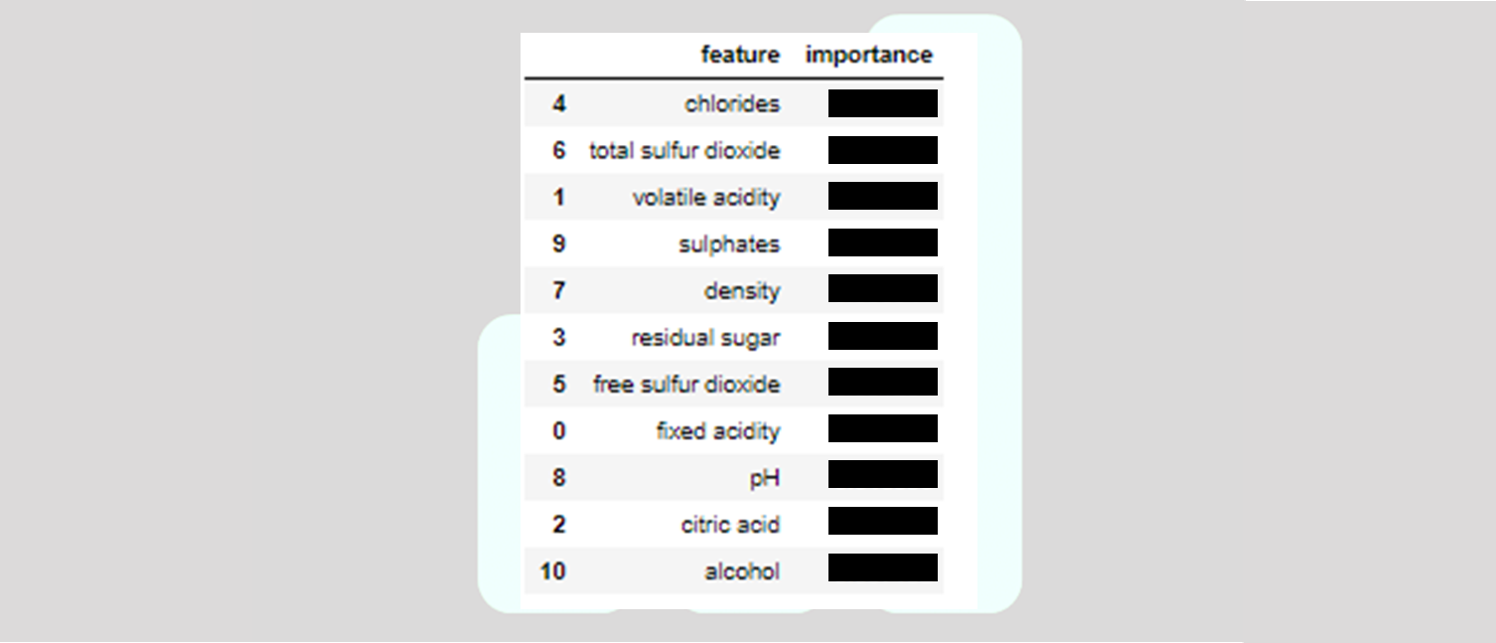

In [24]:
# Step 9: Create a DataFrame containing your column names and its corresponding feature importance
pd.DataFrame({'feature': X.columns,
             'importance': randf.feature_importances_}).sort_values(by = 'importance', ascending = False)

,feature,importance
6,total sulfur dioxide,0.306049
4,chlorides,0.294446
1,volatile acidity,0.117313
5,free sulfur dioxide,0.067119
9,sulphates,0.049370
7,density,0.046282
3,residual sugar,0.044868
0,fixed acidity,0.033125
8,pH,0.018319
2,citric acid,0.013866


### [Optional] Visualize the differences in the top features for red and white wine
Now that we've identified the top features, you can plot a barplot to visualize the differences in features for those two types of wine. 

You can also go back to Part II and search for those boxplots! 

# The end
And that's the end! To recap, you've:
1. Collected and merged data for subsequent analysis
2. Performed univariate and bivariate analysis with the dataset
3. Trained a machine learning model to predict wine quality
4. Trained a machine learning model to predict whether a wine contains white or red qualities
5. Interpret the significance of the model with respect to the business use case

Go on, give yourself a pat on the back. We hope this project series has give you more confidence in coding and machine learning. 

You have successfully implemented machine learning in wine quality, and reframing a business problem to derive an easier problem to work with. 

Whatever you learn here is but a tip of the iceberg, and launchpad for bigger and better things to come. Come join us in our Telegram community over at https://bit.ly/UpLevelSG and our Facebook page at https://fb.com/UpLevelSG